# Network Communities Detection 

<a href="https://colab.research.google.com/github/CGnal/agos-ai-course/blob/day4/day4/04_Community_Detection_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.15


In [2]:
!pip install \
networkx==2.6.3 \
scikit-learn==1.0.2\
pandas==1.3.5\
python-louvain==0.16

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In this notebook, we will explore some methods to perform a community detection using several algortihms. Before testing the algorithms, let us create a simple benchmark graph. 

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt

In [18]:
import numpy as np
import pandas as pd

In [19]:
import networkx as nx 
G = nx.barbell_graph(m1=10, m2=4)

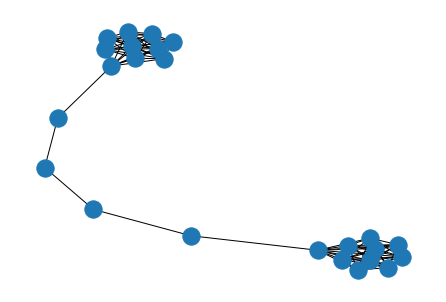

In [21]:
nx.draw_spring(G)

### Spectral Decomposition

The following image show how the spectral cluster embedding works on a simple grid graph

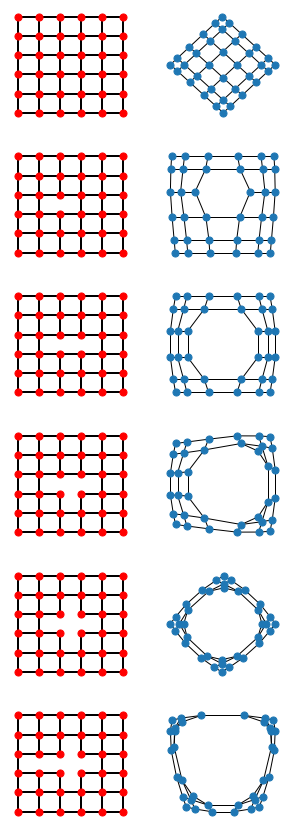

In [22]:
import matplotlib.pyplot as plt
import networkx as nx


options_1 = {"node_color": "C0", "node_size": 50}
options_2 = {"node_color": "red", "node_size": 50, "edge_color": 'black', 'width': 2,
             'pos': {(i, j): np.array([i, j]) for i in range(6) for j in range(6)}}

plt.figure(figsize=(5,15))

G_grid = nx.grid_2d_graph(6, 6)
plt.subplot(6, 2, 1)
nx.draw(G_grid, **options_2)
plt.subplot(6, 2, 2)
nx.draw_spectral(G_grid, **options_1)

G_grid.remove_edge((2, 2), (2, 3))
plt.subplot(6, 2, 3)
nx.draw(G_grid, **options_2)
plt.subplot(6, 2, 4)
nx.draw_spectral(G_grid, **options_1)

G_grid.remove_edge((3, 2), (3, 3))
plt.subplot(6, 2, 5)
nx.draw(G_grid, **options_2)
plt.subplot(6, 2, 6)
nx.draw_spectral(G_grid, **options_1)

G_grid.remove_edge((2, 2), (3, 2))
plt.subplot(6, 2, 7)
nx.draw(G_grid, **options_2)
plt.subplot(6, 2, 8)
nx.draw_spectral(G_grid, **options_1)

G_grid.remove_edge((2, 3), (3, 3))
plt.subplot(6, 2, 9)
nx.draw(G_grid, **options_2)
plt.subplot(6, 2, 10)
nx.draw_spectral(G_grid, **options_1)

G_grid.remove_edge((1, 2), (1, 3))
plt.subplot(6, 2, 11)
nx.draw(G_grid, **options_2)
plt.subplot(6, 2, 12)
nx.draw_spectral(G_grid, **options_1)

plt.show()

### Spectral Clustering

We now perform a spectral clustering based on the adjacency matrix of the graph. Spectral clustering basically remaps the Laplacian (degree diagonal matrix - adjacency matrix) into the basis of the first $k$ eigenvectors, and perform a k-means in that space.

We start using a spectral 2-D embedding and a 2-means clustering

In [23]:
adj=np.array(nx.adjacency_matrix(G).todense())

In [24]:
from networkx.drawing.layout import _spectral
from sklearn.cluster import KMeans

spectral_dec = _spectral(adj, 2)

predictions = KMeans(n_clusters=3).fit_predict(spectral_dec).tolist()

communities = [set(), set(), set()]
for node in G.nodes:
  communities[predictions[node]].add(node)

In [25]:
communities

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9},
 {14, 15, 16, 17, 18, 19, 20, 21, 22, 23},
 {10, 11, 12, 13}]

In [26]:
predictions

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

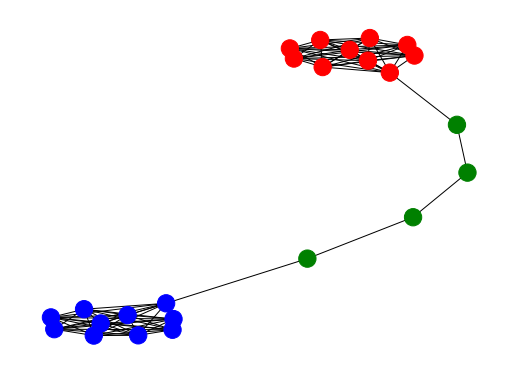

In [27]:
plt.figure(figsize=(7, 5))
cols = [
    "red" if node in communities[0] else "blue" if node in communities[1] else 'green' for node in G.nodes
]
nx.draw_spring(G, node_color=cols)

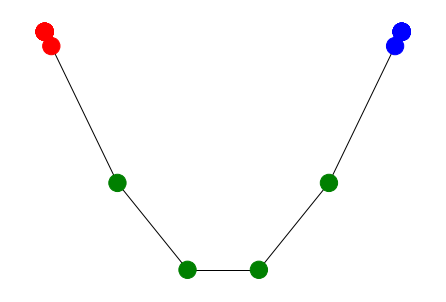

In [28]:
nx.draw_spectral(G, node_color=cols)

In the next cell we performe the spectrl method with KMeans algorithm using k=2 for both spectral embedding and k-means clustering

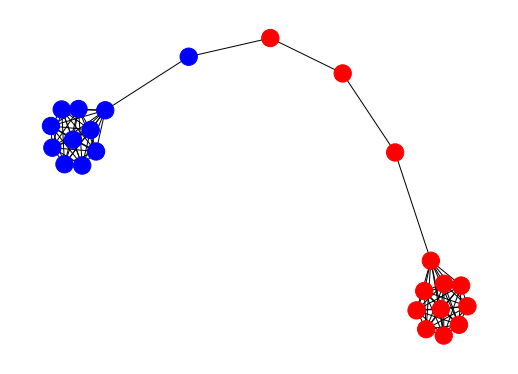

In [30]:
from networkx.drawing.layout import _spectral
from sklearn.cluster import KMeans

spectral_dec = _spectral(adj, 2)
predictions = KMeans(n_clusters=2).fit_predict(spectral_dec).tolist()
communities = [set(), set()]
for node in G.nodes:
  communities[predictions[node]].add(node)

plt.figure(figsize=(7, 5))
cols = [
    "red" if node in communities[0] else "blue" for node in G.nodes
]
nx.draw_spring(G, node_color=cols)

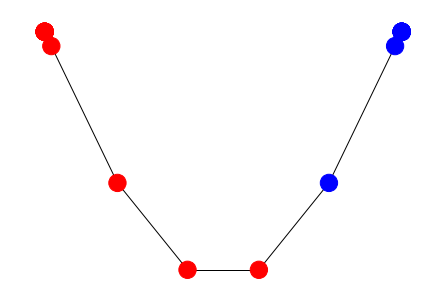

In [32]:
nx.draw_spectral(G, node_color=cols)

The next command shows the node ids belonging to the different communities

In [44]:
communities

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14},
 {9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}]

We now try to use 3D spectral embedding and 3-means clustering

### Non Negative Matrix Factorization 

Here, we again use matrix factorization, but now using the Non-Negative Matrix Factorization, and associating the clusters with the latent dimensions.

In [45]:
from sklearn.decomposition import NMF

In [46]:
nmf = NMF(n_components=2)

In [47]:
emb = nmf.fit_transform(adj)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


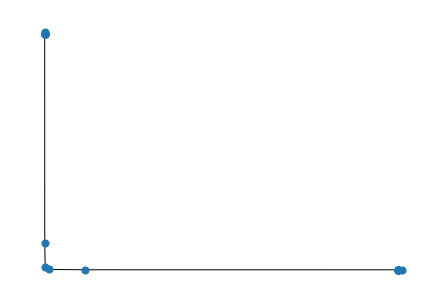

In [48]:
nx.draw(G, pos=emb, node_size=50)

By setting a threshold value of 0.01, we determine which nodes belong to the given community.

In [49]:
communities = [set(np.where(emb[:,ith]>0.01)[0]) for ith in range(2)]

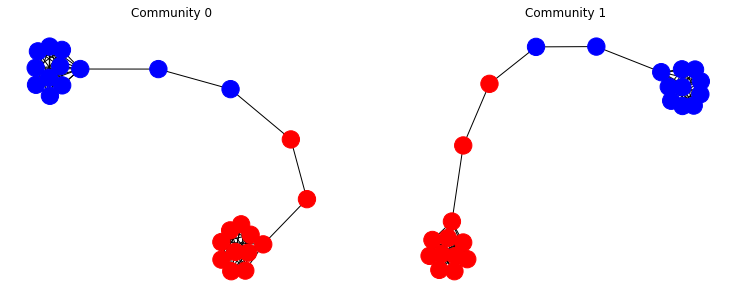

In [50]:
plt.figure(figsize=(20, 5))

for ith, community in enumerate(communities):
    cols = ["red" if node in community else "blue" for node in G.nodes]
    plt.subplot(1,3,ith+1)
    plt.title(f"Community {ith}")
    nx.draw_spring(G, node_color=cols)

Although the example above does not show this, in general this clustering method may be non-mutually exclusive, and nodes may belong to more than one community

In [51]:
communities = [set(np.where(emb[:,ith]>0)[0]) for ith in range(2)]

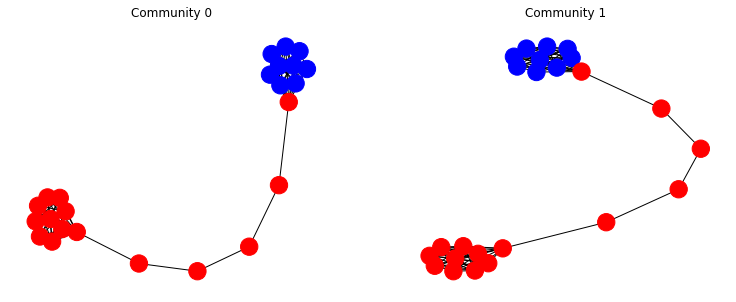

In [52]:
plt.figure(figsize=(20, 5))

for ith, community in enumerate(communities):
    cols = ["red" if node in community else "blue" for node in G.nodes]
    plt.subplot(1,3,ith+1)
    plt.title(f"Community {ith}")
    nx.draw_spring(G, node_color=cols)

### Clustering in the embedding space

In [53]:
from sklearn.mixture import GaussianMixture

In [54]:
gm = GaussianMixture(n_components=3, random_state=0)

In [55]:
labels = gm.fit_predict(emb)

In [56]:
colors = ["blue", "green", "red"]

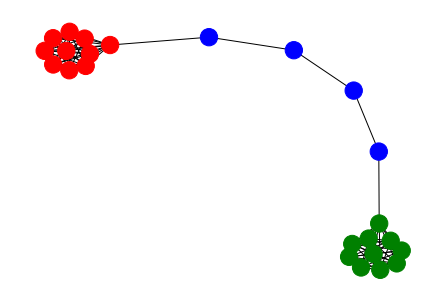

In [57]:
nx.draw_spring(G, node_color=[colors[label] for label in labels])

Using the Laplacian

In [58]:
lap = nx.laplacian_matrix(G).todense()

In [59]:
from scipy.sparse import identity
from scipy.sparse.linalg import eigs

_, emb = eigs(lap * 1.0, 3, sigma=0)

In [60]:
emb = np.real(emb)

In [61]:
gm = GaussianMixture(n_components=3, random_state=0)
labels = gm.fit_predict(emb)

colors = ["blue", "green", "red", "yellow", "black"]

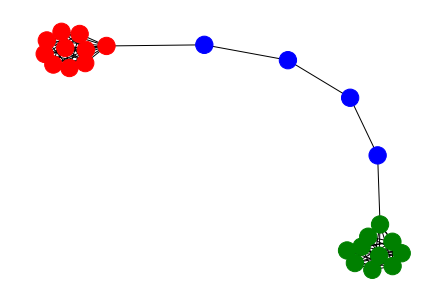

In [62]:
nx.draw_spring(G, node_color=[colors[label] for label in labels])

### Louvain and Modularity Optimization

Here, we use the Louvain method, which is one of the most popular methods for performing community detection, even on fairly large graphs. As described in the chapter, the Louvain method basically optimize the partitioning (it is a mutually exclusing community detection algorithm), identifying the one that maximize the modularity score, meaning that nodes belonging to the same community are very well connected among themself, and weakly connected to the other communities. 

**Louvain, unlike other community detection algorithms, does not require to specity the number of communities in advance and find the best, optimal number of communities.**

In [63]:
from community import community_louvain
communities = community_louvain.best_partition(G)
communities

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 2,
 20: 2,
 21: 2,
 22: 2,
 23: 2}

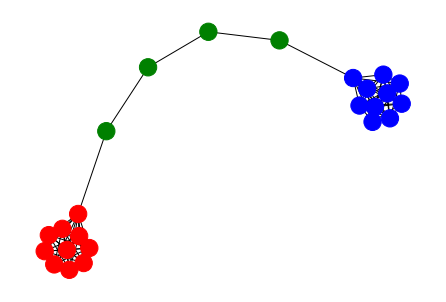

In [64]:
#c = pd.Series({node: colors[comm] for node, comm in communities.items()}).values
nx.draw_spring(G, node_color=[colors[comm] for comm in communities.values()])

### Girvan Newman

The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph. The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality, at each step. As the graph breaks down into pieces, the tightly knit community structure is exposed and the result can be depicted as a dendrogram.

**BE AWARE that because of the betweeness centrality computation, this method may not scale well on large graphs**

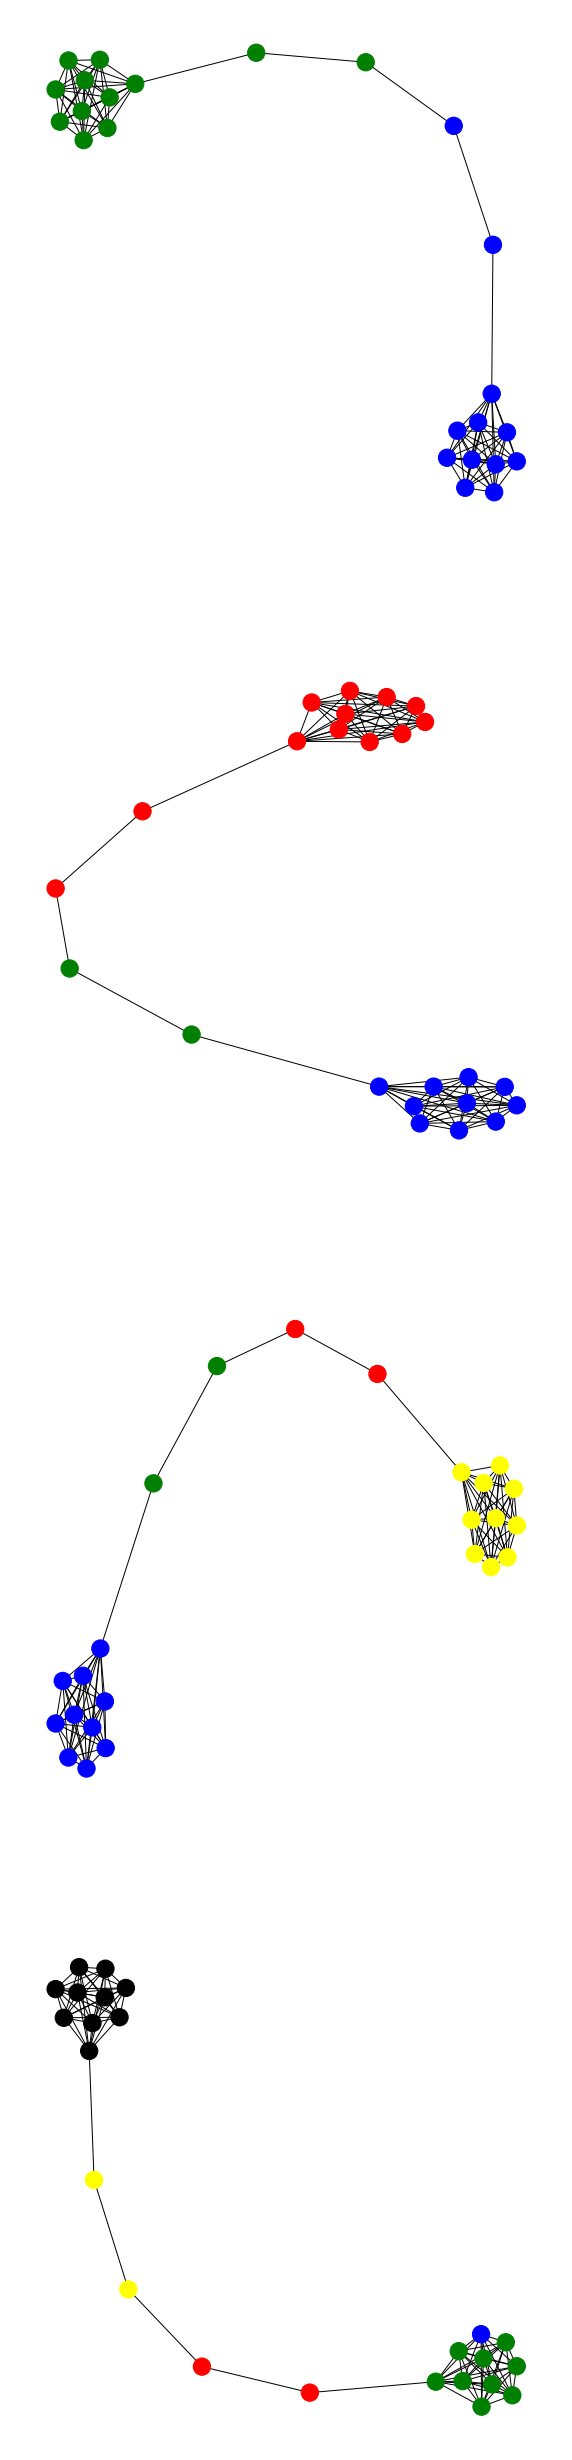

In [65]:
from networkx.algorithms.community.centrality import girvan_newman
import itertools
communities_generator = girvan_newman(G)
plt.figure(figsize=(10, 45))
i=1
for communities in itertools.islice(communities_generator, 4):
    plt.subplot(4, 1, i)
    nx.draw_spring(G, node_color=[colors[ith] for ith, comm in enumerate(communities) for node in G.nodes if node in comm])
    i+=1

# Karate Club Dataset

In [66]:
G = nx.karate_club_graph()

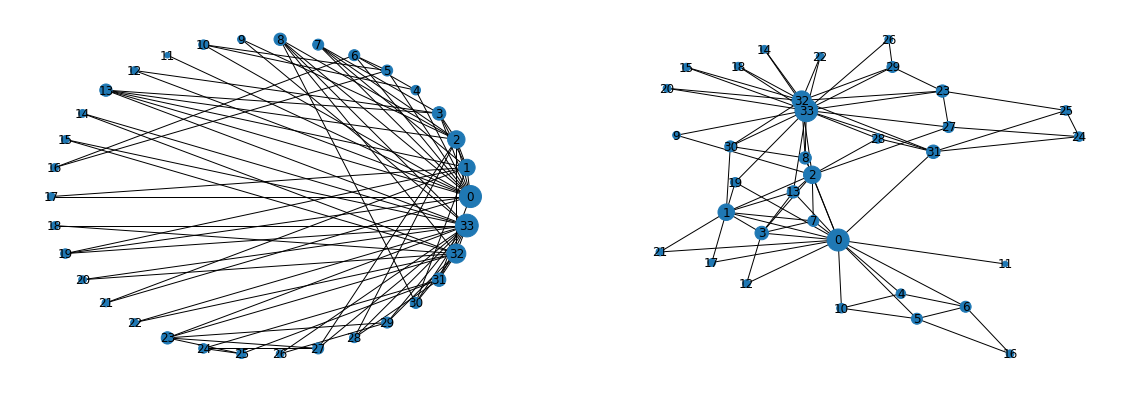

In [67]:
node_sizes = [el*1000 for el in nx.degree_centrality(G).values()]

plt.figure(figsize=(20, 7))
nx.draw_circular(G, with_labels=True, node_size=node_sizes)
plt.subplot(1,2,1)
nx.draw_circular(G, with_labels=True, node_size=node_sizes)
plt.subplot(1,2,2)
nx.draw_spring(G, with_labels=True, node_size=node_sizes)

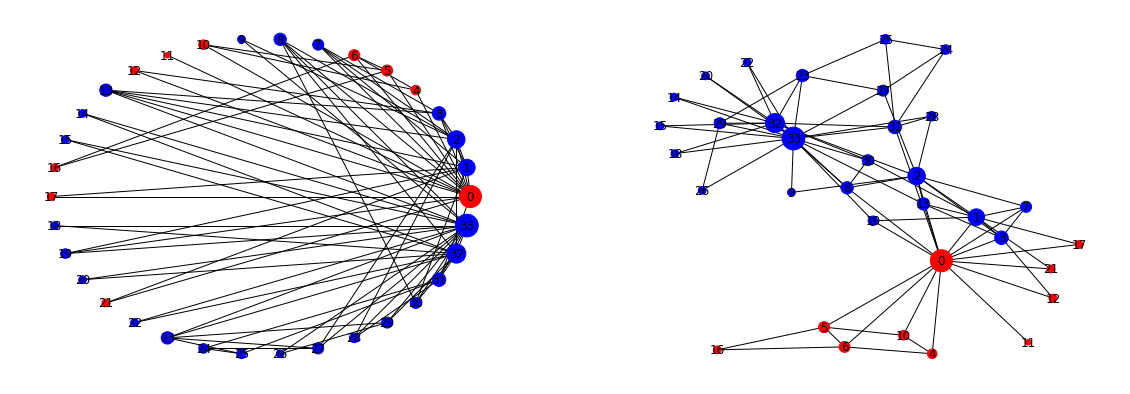

In [68]:
# spectral clustering
lap = nx.laplacian_matrix(G).todense()
eigenvalues, emb = eigs(lap*1.0, k=6, sigma=0.0001)

emb = np.real(emb)[:, 0:2]
predictions = KMeans(n_clusters=2, tol=0).fit_predict(emb).tolist()
communities = [set(), set(), set()]
for node in G.nodes:
  communities[predictions[node]].add(node)

plt.figure(figsize=(20, 7))
cols = [
    "red" if node in communities[0] else "blue" for node in G.nodes
]
plt.subplot(1,2,1)
nx.draw_circular(G, with_labels=True, node_color=cols, node_size=node_sizes)
plt.subplot(1,2,2)
nx.draw_spring(G, with_labels=True, node_color=cols, node_size=node_sizes)

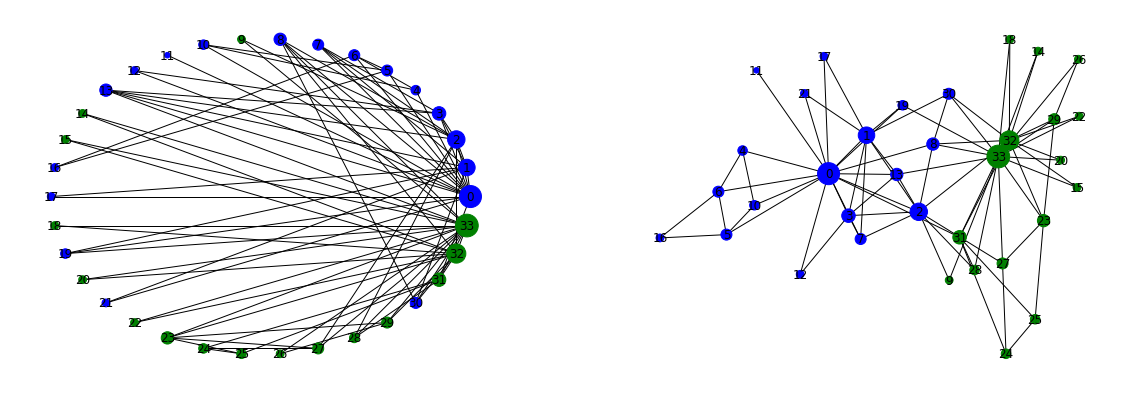

In [69]:
# Gaussian Mixture
gm = GaussianMixture(n_components=2, random_state=0)
labels = gm.fit_predict(emb)

colors = ["blue", "green", "red", "yellow", "black"]
plt.figure(figsize=(20, 7))
cols = [colors[label] for label in labels]
plt.subplot(1,2,1)
nx.draw_circular(G, with_labels=True, node_color=cols, node_size=node_sizes)
plt.subplot(1,2,2)
nx.draw_spring(G, with_labels=True, node_color=cols, node_size=node_sizes)

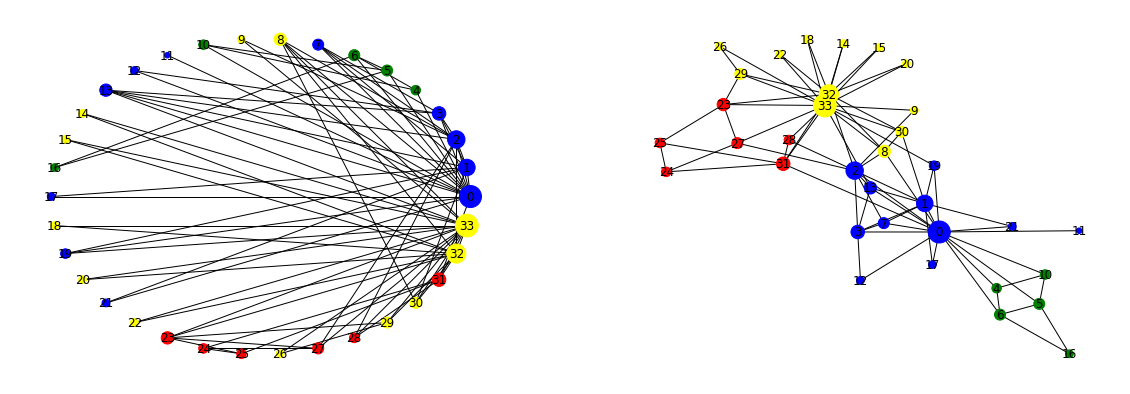

In [70]:
# louvain 
from community import community_louvain
plt.figure(figsize=(20, 7))
communities = community_louvain.best_partition(G)
cols = [colors[comm] for comm in communities.values()]
plt.subplot(1,2,1)
nx.draw_circular(G, with_labels=True, node_color=cols, node_size=node_sizes)
plt.subplot(1,2,2)
nx.draw_spring(G, with_labels=True, node_color=cols, node_size=node_sizes)

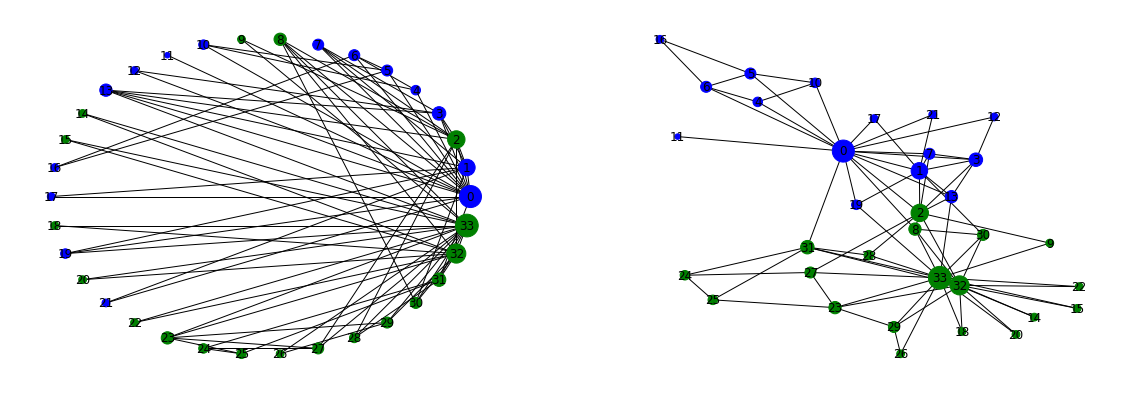

In [71]:
# Girvan Newman
communities_generator = girvan_newman(G)
plt.figure(figsize=(20, 7))
communities = next(communities_generator)
cols=[colors[ith] for node in G.nodes for ith, comm in enumerate(communities) if node in comm]
plt.subplot(1,2,1)
nx.draw_circular(G, with_labels=True, node_color=cols, node_size=node_sizes)
plt.subplot(1,2,2)
nx.draw_spring(G, with_labels=True, node_color=cols, node_size=node_sizes)

In [72]:
def most_valuable_edge(G):
    """Returns the edge with the highest betweenness centrality
    in the graph `G`.

    """
    # We have guaranteed that the graph is non-empty, so this
    # dictionary will never be empty.
    betweenness = nx.edge_betweenness_centrality(G)
    return max(betweenness, key=betweenness.get)

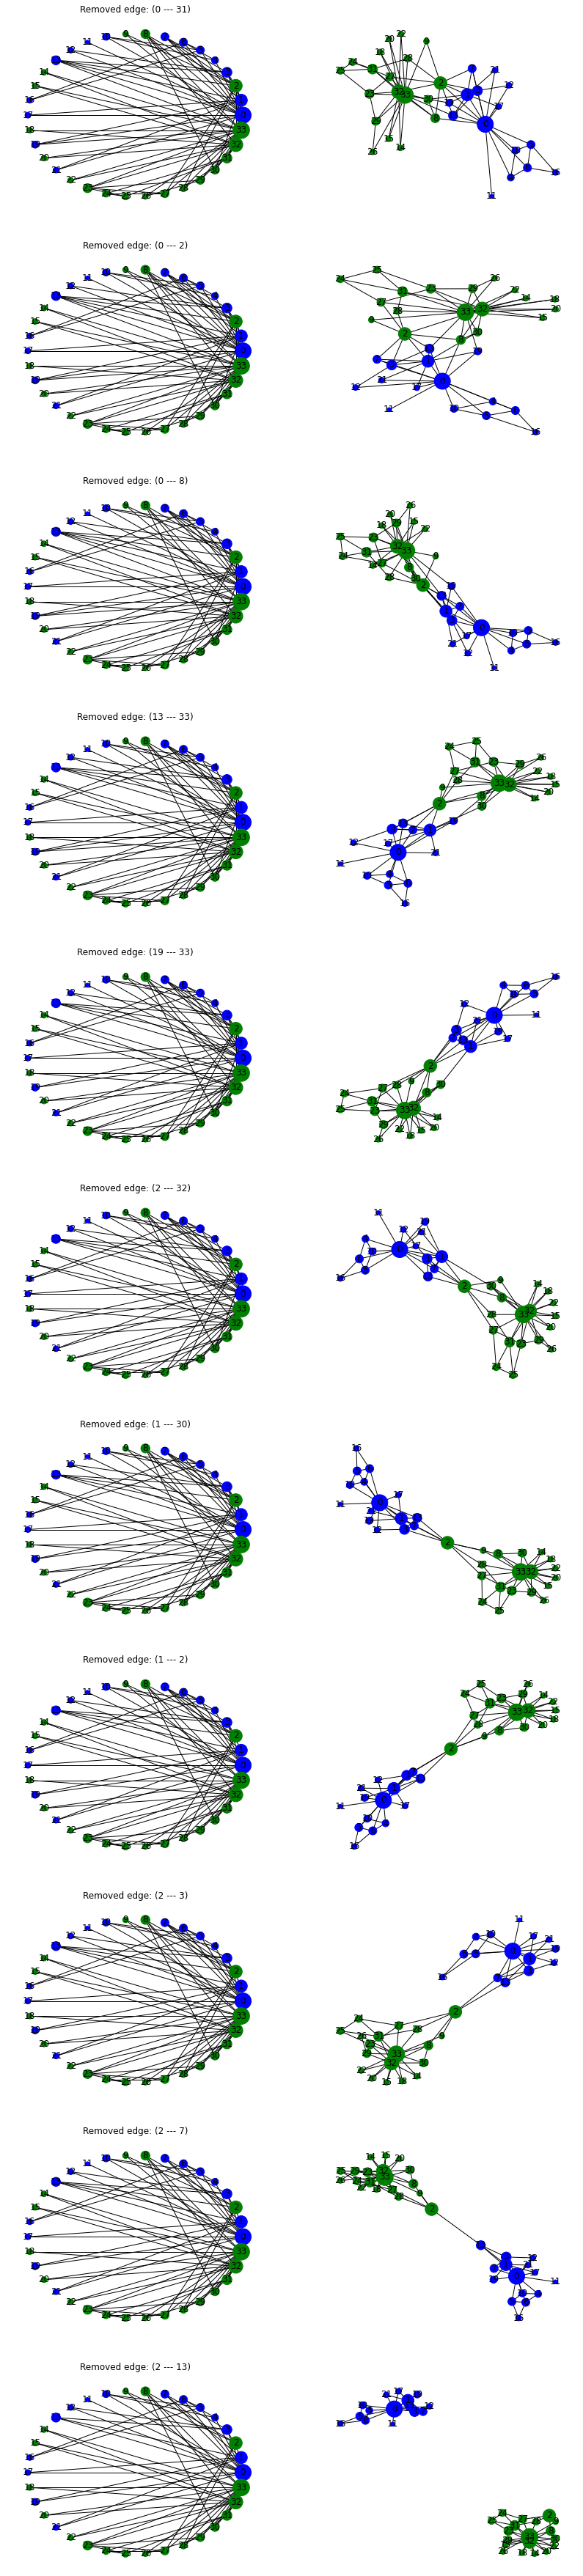

In [73]:
G_copy = G.copy()
original_num_components = nx.number_connected_components(G_copy)
num_new_components = original_num_components
i = 1
plt.figure(figsize=(14, 70))
while num_new_components <= original_num_components:
    edge = most_valuable_edge(G_copy)
    G_copy.remove_edge(*edge)
    plt.subplot(12,2,i)
    nx.draw_circular(G_copy, with_labels=True, node_color=cols, node_size=node_sizes)
    plt.title(f'Removed edge: ({edge[0]} --- {edge[1]})')
    plt.subplot(12,2,i+1)
    nx.draw_spring(G_copy, with_labels=True, node_color=cols, node_size=node_sizes)
    new_components = tuple(nx.connected_components(G_copy))
    num_new_components = len(new_components)
    i+=2